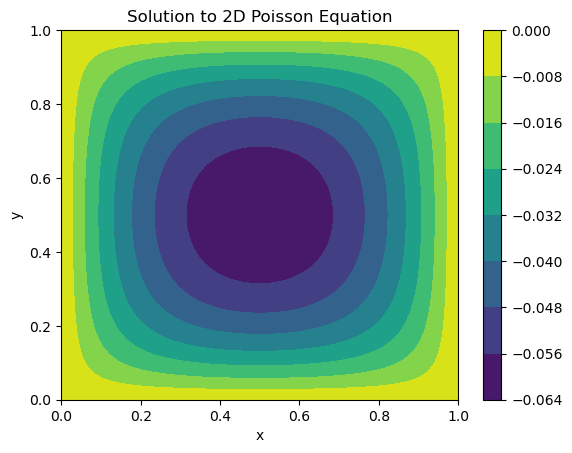

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Define the parameters
Lx = Ly = 1.0  # domain size
Nx = Ny = 50  # number of grid points
dx = Lx / (Nx - 1)  # grid spacing
dy = Ly / (Ny - 1)

# Create a grid
x = np.linspace(0, Lx, Nx)
y = np.linspace(0, Ly, Ny)
X, Y = np.meshgrid(x, y)

# Initialize the solution matrix
u = np.zeros((Nx, Ny))

# Set boundary conditions
u[:, 0] = 0  # u(x, 0) = 0
u[:, -1] = 0  # u(x, Ly) = 0
u[0, :] = 0  # u(0, y) = 0
u[-1, :] = 0  # u(Lx, y) = 0

# Define the source term
f = np.ones((Nx, Ny))  # For simplicity, set f(x, y) = 1

# Perform iterations for solving the Poisson equation
num_iterations = 1000
for iteration in range(num_iterations):
    u[1:-1, 1:-1] = (dy**2 * (u[2:, 1:-1] + u[:-2, 1:-1]) +
                    dx**2 * (u[1:-1, 2:] + u[1:-1, :-2]) -
                    dx**2 * dy**2 * f[1:-1, 1:-1]) / (2 * (dx**2 + dy**2))

# Plot the solution
plt.contourf(X, Y, u.T, cmap='viridis')
plt.colorbar()
plt.title('Solution to 2D Poisson Equation')
plt.xlabel('x')
plt.ylabel('y')
plt.show()